In [31]:
import cv2
import matplotlib.pyplot as plt # on utilise matplotlib pour afficher les images sinon on fait crash le kernel avec cv2.imshow
import numpy as np

In [32]:
def show_image(image,titre="image"):
    """ Fonction qui affiche une image avec matplotlib car openCV ne fonctionne pas avec jupyter notebook pour l'affichage
    
    Args
    ----
    image: numpy.ndarray
        Image à afficher
    titre: str
        titre de l'image
    """
    # on convertit l'image en RGB pour l'afficher avec matplotlib car OpenCV utilise BGR
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(titre)
    plt.show()

def group_show(liste_image,titres):
    """ Pour afficher directement les images par team

    Args
    ----
    liste_image: list
        liste des images à afficher
    titres: list
        titre des images
    """
    if titres == None: # on gère le cas où les titres ne sont pas renseignés
        titres = [None]*len(liste_image)

    fig, ax = plt.subplots(1, len(liste_image), figsize=(20, 20))
    for i in range(len(liste_image)):
        ax[i].imshow(liste_image[i])
        ax[i].set_title(titres[i])

hauteur:  570 largeur:  1019
y:  5 x:  10


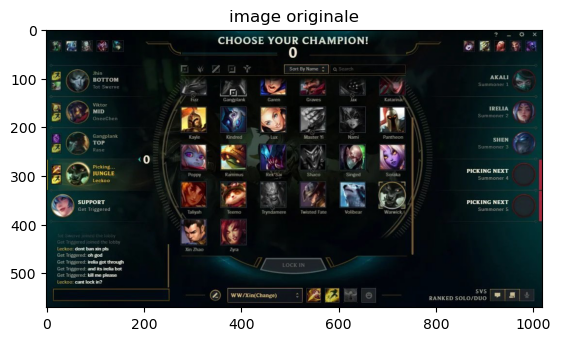

In [33]:
img = cv2.imread("champ_select.jpg")
hauteur, largeur = img.shape[:2]
print("hauteur: ", hauteur, "largeur: ", largeur)
y = int(hauteur/100) # on va utiliser des pourcentages pour recadrer l'image afin de pouvoir l'utiliser sur d'autres images qui ne seraient pas de la même taille
x = int(largeur/100)
print("y: ", y, "x: ", x)

show_image(img, "image originale")

In [34]:
sep_h_img = int((9/570)*hauteur)
ratio_deb_h = int((81/570)*hauteur)
ratio_icon_h = int((55/570)*hauteur)

liste_champ_1=[[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]

for i in range(len(liste_champ_1)):
    liste_champ_1[i][0] = img[ratio_deb_h+i*(ratio_icon_h+sep_h_img):ratio_deb_h+i*(ratio_icon_h+sep_h_img)+ratio_icon_h, int((40/1019)*largeur):int((40/1019)*largeur)+int((55/1019)*largeur)]
    liste_champ_1[i][1] = img[ratio_deb_h+i*(ratio_icon_h+sep_h_img):ratio_deb_h+i*(ratio_icon_h+sep_h_img)+ratio_icon_h, int((10/1019)*largeur):int((10/1019)*largeur)+int((55/1019)*largeur)]

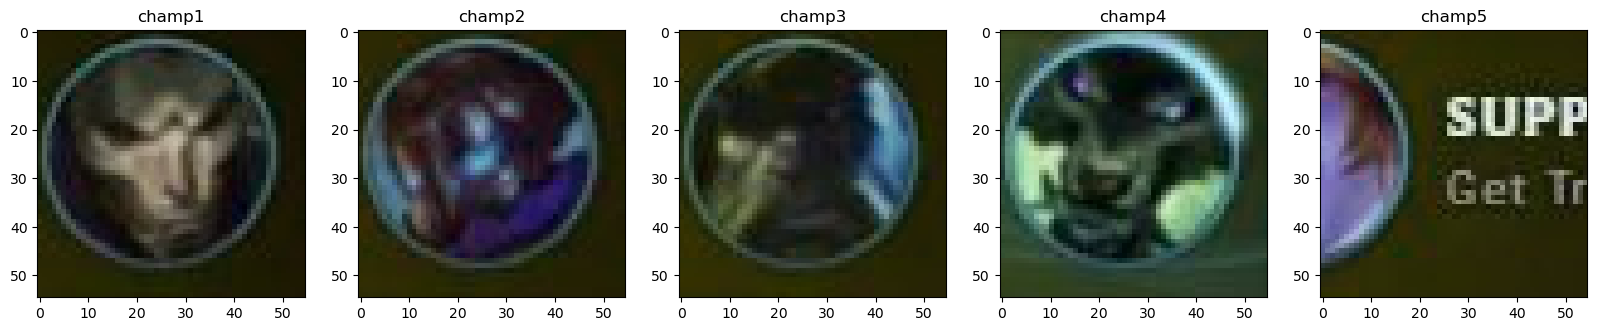

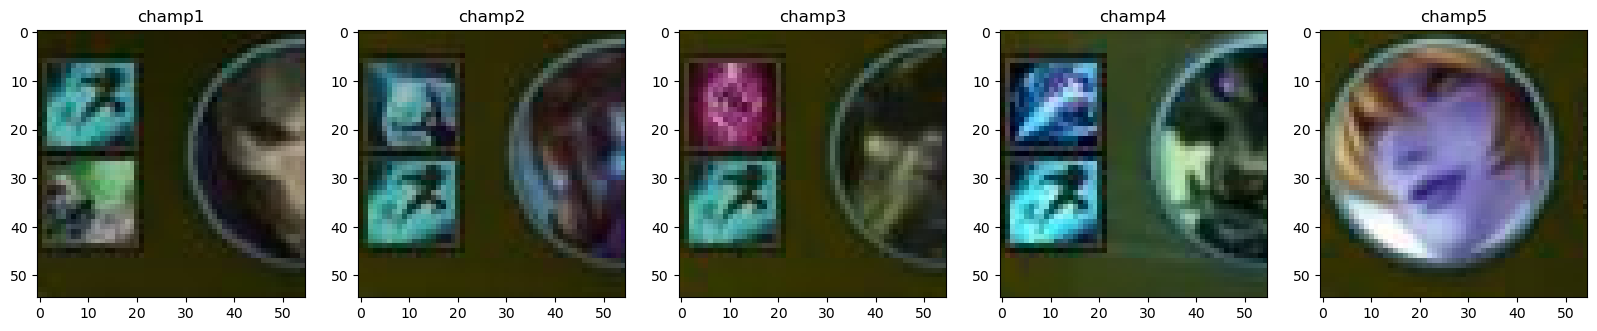

In [35]:
liste_champ_col_1 = list(list(zip(*liste_champ_1))[0])
liste_champ_col_2 = list(list(zip(*liste_champ_1))[1])
titres_1 = ["champ1", "champ2", "champ3", "champ4", "champ5"]

group_show(liste_champ_col_1, titres_1)
group_show(liste_champ_col_2, titres_1)

Taille icone ratio : 
hor : 50/1019
vert : 50/570

On peut prendre 55 pour avoir un peu de marge

écart entre 2 : 9

haut 1 : 81
gauche pas décalée : 40

gauche décalée : 10

droite : 956


In [36]:
sep_h_img = int((9/570)*hauteur)
ratio_deb_h = int((81/570)*hauteur)
ratio_icon_h = int((55/570)*hauteur)

liste_champ_2 = [[],[],[],[],[]]

for i in range(len(liste_champ_2)):
    liste_champ_2[i].append(img[ratio_deb_h+i*(ratio_icon_h+sep_h_img):ratio_deb_h+i*(ratio_icon_h+sep_h_img)+ratio_icon_h, int((956/1019)*largeur):int((956/1019)*largeur)+int((55/1019)*largeur)])

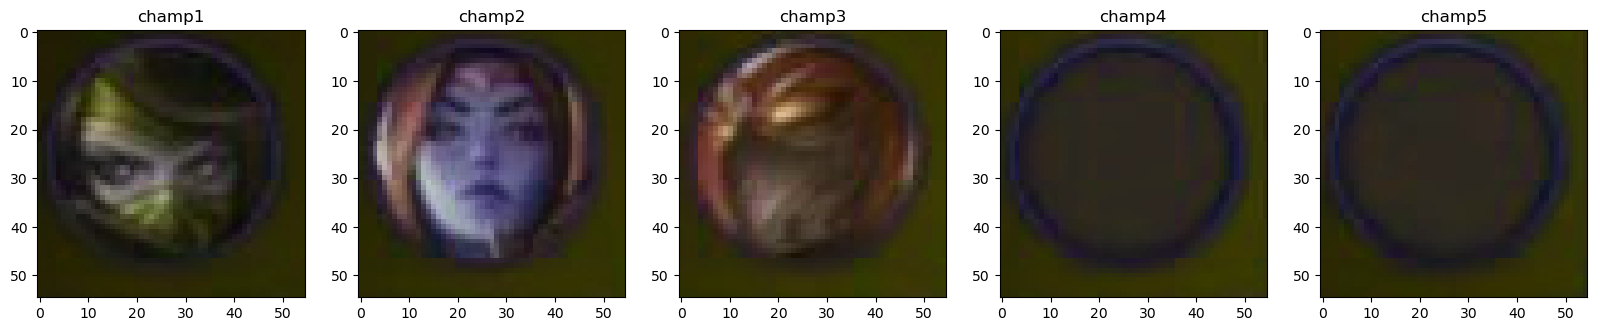

In [37]:
liste_champ_2_modif = list(list(zip(*liste_champ_2))[0])
titres_2 = ["champ1", "champ2", "champ3", "champ4", "champ5"]
group_show(liste_champ_2_modif, titres_2)

In [38]:
def detection_champ(image,titre):
    """ Fonction qui détecte les champions de la champ select avec des cercles

    Args
    ----
    image: list of numpy.ndarray
        liste d'images dans laquelle on veut détecter les cercles pour un champion : car il y a un décalage entre les deux images
    titre: str
        titre de l'image

    Returns
    -------
    image: numpy.ndarray
        image avec les cercles détectés
    """

    cv2.imwrite(f"{titre}.jpg", image[0])
    img = cv2.imread(f"{titre}.jpg",0)
    
    if len(image)>1:
        cv2.imwrite(f"{titre}.jpg", image[1])
        image_pos_2 = cv2.imread(f"{titre}.jpg",0)

    # increase the contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)

    # detect and show circles in the "img" image
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,80,
                                param1=50,param2=30,minRadius=12,maxRadius=50)
    if len(image)>1:
        if circles is not None :
            # on essaie avec la première image
            circles = np.uint16(np.around(circles))
            for i in circles[0,:]:
                # draw the outer circle
                cv2.circle(image[0],(i[0],i[1]),i[2],(0,255,0),1)
                return(image[0])
        else :
            # on passe sur la deuxième image si elle existe
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            image_pos_2 = clahe.apply(image_pos_2)
            circles = cv2.HoughCircles(image_pos_2,cv2.HOUGH_GRADIENT,1,80,param1=50,param2=30,minRadius=12,maxRadius=50)
            
            if circles is not None:
                circles = np.uint16(np.around(circles))
                for i in circles[0,:]:
                    # draw the outer circle
                    cv2.circle(image[1],(i[0],i[1]),i[2],(0,255,0),1)
            return(image[1])

    elif circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(image[0],(i[0],i[1]),i[2],(0,255,0),1)
    return(image[0])

In [39]:
images_detect_1 = []
for i,image in enumerate(liste_champ_1):
    images_detect_1.append(detection_champ(image, titres_1[i]))

images_detect_2 = []
for i,image in enumerate(liste_champ_2):
    images_detect_2.append(detection_champ(image, titres_2[i]))

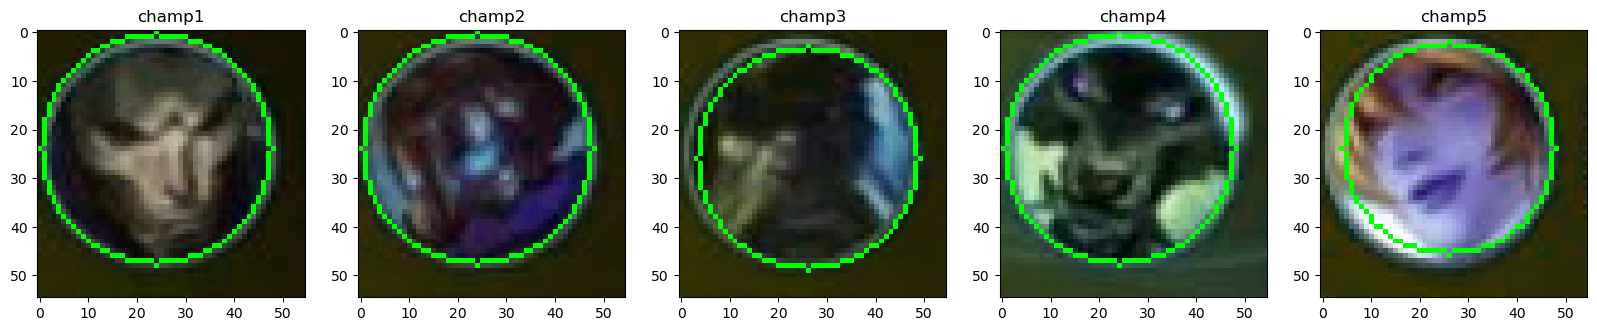

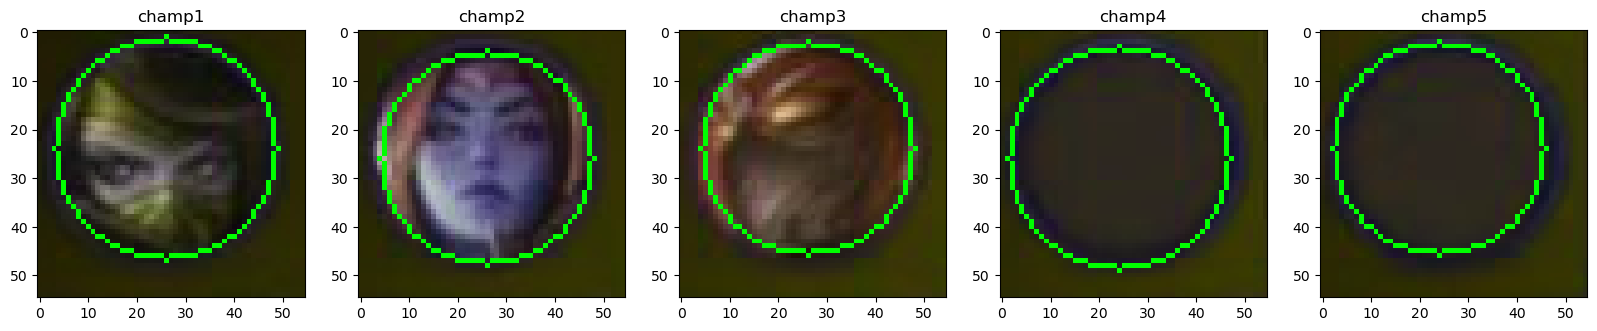

In [40]:
group_show(images_detect_1, titres_1)
group_show(images_detect_2, titres_2)

### Récup des bans

Ratio largeur bans : 22/1019
Ratio hauteur bans : 22/570

Prendre 25 pour être large

Ratio séparation : 8/1019

Début gauche (bans 1) ratio : 9/1019
Début haut ratio : 20/570

In [41]:
sep_l_img = int((8/1019)*largeur)
ratio_deb_h = int((22/570)*hauteur)

ratio_icon_l = int((25/1019)*largeur)
ratio_icon_h = int((25/570)*hauteur)

ratio_deb_l_1 = int((9/1019)*largeur)
ratio_deb_l_2 = int((856/1019)*largeur)

liste_bans_1 = [[],[],[],[],[]]
liste_bans_2 = [[],[],[],[],[]]

for i in range(len(liste_champ_2)):
    liste_bans_1[i].append(img[ratio_deb_h:ratio_deb_h+ratio_icon_h,ratio_deb_l_1+i*(ratio_icon_l+sep_l_img):ratio_deb_l_1+i*(ratio_icon_l+sep_l_img)+ratio_icon_l])
    liste_bans_2[i].append(img[ratio_deb_h:ratio_deb_h+ratio_icon_h,ratio_deb_l_2+i*(ratio_icon_l+sep_l_img):ratio_deb_l_2+i*(ratio_icon_l+sep_l_img)+ratio_icon_l])

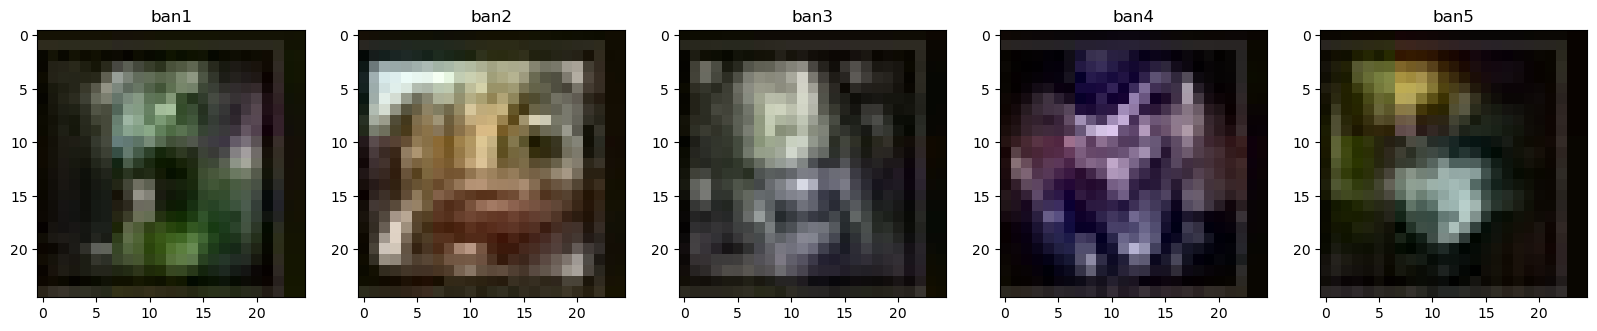

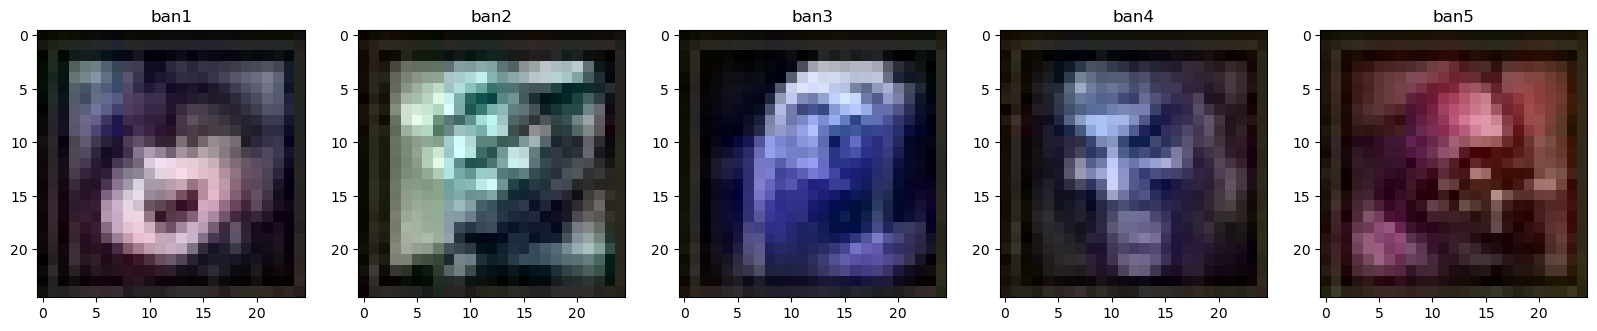

In [42]:
liste_bans_1_modif = list(list(zip(*liste_bans_1))[0])
titres_bans_1 = ["ban1","ban2", "ban3", "ban4", "ban5"]
group_show(liste_bans_1_modif, titres_bans_1)

liste_bans_2_modif = list(list(zip(*liste_bans_2))[0])
titres_bans_2 = ["ban1","ban2", "ban3", "ban4", "ban5"]
group_show(liste_bans_2_modif, titres_bans_2)